In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv(r"C:\Users\Harsh Haldankar\Downloads\Mall_Customers - Mall_Customers.csv",index_col=0,header=0)

In [5]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [6]:
data.shape

(200, 4)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [8]:
data.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
x = data.values[:,[2,3]]
x

array([[15, 39],
       [15, 81],
       [16, 6],
       [16, 77],
       [17, 40],
       [17, 76],
       [18, 6],
       [18, 94],
       [19, 3],
       [19, 72],
       [19, 14],
       [19, 99],
       [20, 15],
       [20, 77],
       [20, 13],
       [20, 79],
       [21, 35],
       [21, 66],
       [23, 29],
       [23, 98],
       [24, 35],
       [24, 73],
       [25, 5],
       [25, 73],
       [28, 14],
       [28, 82],
       [28, 32],
       [28, 61],
       [29, 31],
       [29, 87],
       [30, 4],
       [30, 73],
       [33, 4],
       [33, 92],
       [33, 14],
       [33, 81],
       [34, 17],
       [34, 73],
       [37, 26],
       [37, 75],
       [38, 35],
       [38, 92],
       [39, 36],
       [39, 61],
       [39, 28],
       [39, 65],
       [40, 55],
       [40, 47],
       [40, 42],
       [40, 42],
       [42, 52],
       [42, 60],
       [43, 54],
       [43, 60],
       [43, 45],
       [43, 41],
       [44, 50],
       [44, 46],
       [46, 51],
   

In [1]:
from sklearn.cluster import KMeans

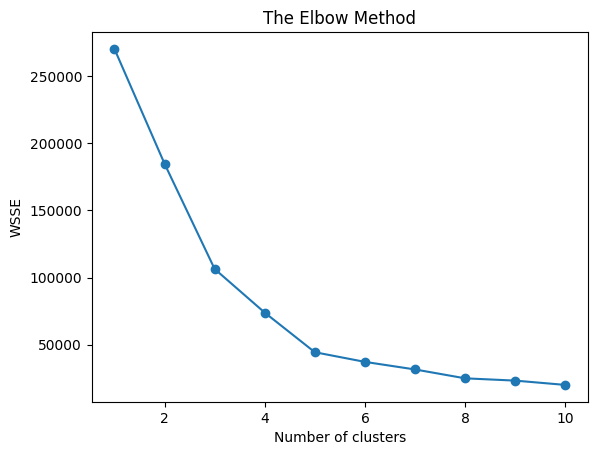

In [13]:
wccs=[]
for i in range(1,11):
    kmean =KMeans(n_clusters = i, random_state = 10)
    kmean.fit(x)
    wccs.append(kmean.inertia_)
plt.plot(range(1,11),wccs)
plt.scatter(range(1,11),wccs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSSE')
plt.show()

In [15]:
kmean = KMeans(n_clusters=5 ,random_state=10)
y_pred = kmean.fit_predict(x)


In [16]:
y_pred

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 1,
       4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 3, 1, 3, 0, 3, 0, 3,
       1, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3])

In [18]:
kmean.inertia_

44448.45544793371

In [19]:
data["clusters"]=y_pred

In [20]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
CustomerID,,,,,
1,Male,19,15,39,4
2,Male,21,15,81,2
3,Female,20,16,6,4
4,Female,23,16,77,2
5,Female,31,17,40,4


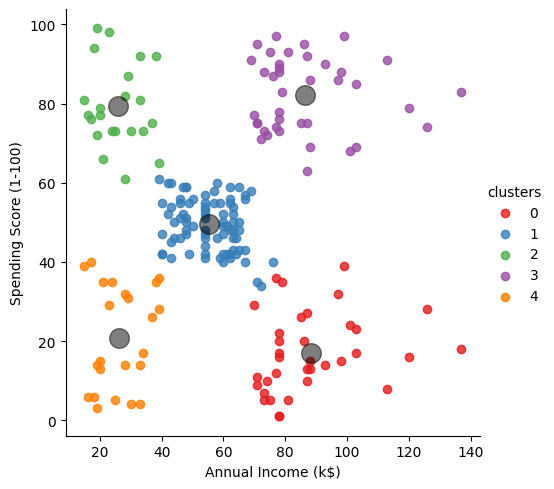

In [26]:
sns.lmplot(data=data , x="Annual Income (k$)" , y="Spending Score (1-100)" , 
           hue = "clusters", palette="Set1", fit_reg=False)
plt.scatter(kmean.cluster_centers_[:,0], kmean.cluster_centers_[:,1],
           s = 200 , c = "black", alpha =0.5)
plt.show()

In [28]:
kmean.cluster_centers_

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348]])

In [30]:
data["clusters"]=data.clusters.replace({0:"Standard",1:"Target",2:"Sensible",3:"Careless",4:"Careful"})

In [31]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
CustomerID,,,,,
1,Male,19,15,39,Careful
2,Male,21,15,81,Sensible
3,Female,20,16,6,Careful
4,Female,23,16,77,Sensible
5,Female,31,17,40,Careful


In [32]:
new_data=data[data["clusters"]=="Target"]

In [33]:
new_data.shape

(81, 5)

In [34]:
new_data

,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
CustomerID,,,,,
44,Female,31,39,61,Target
47,Female,50,40,55,Target
48,Female,27,40,47,Target
49,Female,29,40,42,Target
50,Female,31,40,42,Target
...,...,...,...,...,...
122,Female,38,67,40,Target
123,Female,40,69,58,Target
127,Male,43,71,35,Target
